# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [5]:
len(df_raw)

400

Answer: 400 observations

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The STD of GRE is greater than GPA because the GRE scores have a larger range (200-800) than that of GPA (0-4).   

#### Question 4. Drop data points with missing data


In [7]:
pd.options.display.max_rows = 400   ##Visually inspecting data for NaN's
df_raw

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [8]:
df_raw[pd.isnull(df_raw).any(axis=1)]    ##Show rows w/ missing data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [9]:
df_raw1 = df_raw.dropna() ##Dropping NaN's from data and re-examining data to ensure NaNs were dropped
df_raw1

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [10]:
len(df_raw1)  ## A confirmation that 3 rows were in fact dropped. But that's not enough! We need to know that the right rows were in fact dropped

397

In [11]:
pd.isnull(df_raw1) ## Visually inspecting if null rows were dropped. But there's got to be a more efficient way.

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [12]:
df_raw1[pd.isnull(df_raw1).any(axis=1)] ##Accessing all rows on new DataFrame where data is missing. Voila!

,admit,gre,gpa,prestige


In [13]:
df_raw1.isnull().sum()  ##Confirmation that there are no null rows left.

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: Please see above

#### Question 6. Create box plots for GRE and GPA

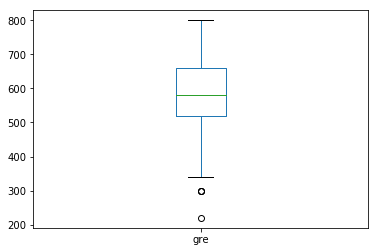

In [14]:
df_raw1['gre'].plot(kind='box')

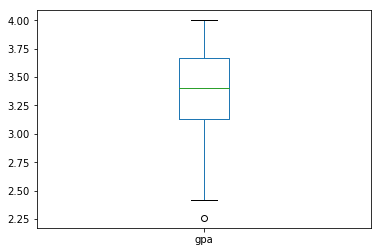

In [15]:
df_raw1['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: These box plots display the dataset's interquartile range (the box itself), median value (the line inside of the box), the range (the "whiskers" extending from the box), and the outlier points (small circles outside of the whiskers). In this case, there are two GRE outliers and one GPA outlier. The GRE box-plot looks like it has less skew than the GPA box-plot.

#### Question 8. Describe each distribution 

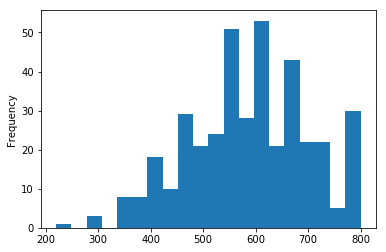

In [16]:
# plot the distribution of each variable 
df_raw1['gre'].plot(kind='hist',bins=20);  ##First, I created a dist for each individually

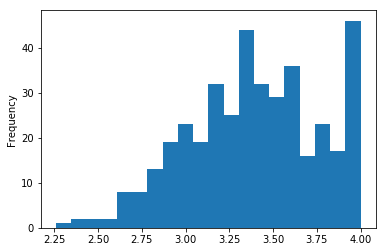

In [17]:
df_raw1['gpa'].plot(kind='hist',bins=20)

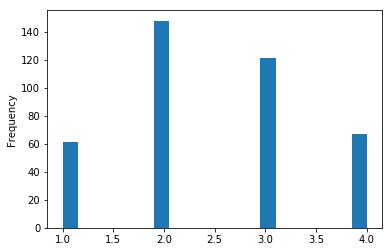

In [18]:
df_raw1['prestige'].plot(kind='hist',bins=20)

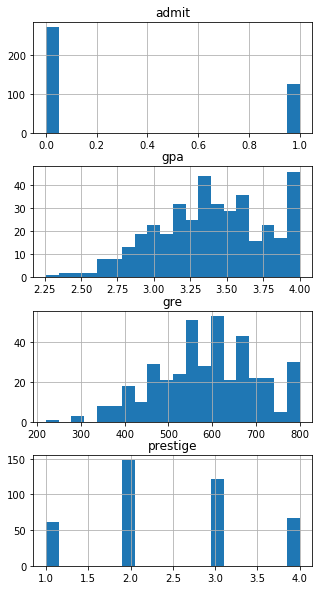

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
df_raw1.hist(column=['gre','gpa','prestige','admit'],bins=20, layout=(4,1), sharex=False, sharey=False);  ##Then, I created a stacked dist 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [20]:
dummy_prestige = pd.get_dummies(df_raw1['prestige'], prefix='prestige')
cols_to_keep = ['admit','gre','gpa']
df_raw2 = df_raw1[cols_to_keep].join(dummy_prestige.ix[:,'prestige_2':])

from scipy.stats import normaltest
print normaltest(df_raw2['gre'])
print normaltest(df_raw2['gpa'])
print normaltest(df_raw2['admit'])
print normaltest(df_raw2['prestige_2.0'])
print normaltest(df_raw2['prestige_3.0'])
print normaltest(df_raw2['prestige_4.0'])

NormaltestResult(statistic=3.8179829306094248, pvalue=0.14822980613776679)
NormaltestResult(statistic=13.07987556091647, pvalue=0.0014445783772290991)
NormaltestResult(statistic=2203.8207987184628, pvalue=0.0)
NormaltestResult(statistic=16.91628893783323, pvalue=0.00021216538512410486)
NormaltestResult(statistic=479.80147263514425, pvalue=6.4928297121161298e-105)
NormaltestResult(statistic=118.35955878172813, pvalue=1.9886042822902336e-26)


Answer: Our model wouldn't meet that requirement as we rejected the null hypothesis (that the sample is normally distributed) for variables 'GPA', 'Prestige', and 'Admit'. This is exhibited by the low p-values. Only the 'GRE' variable meets that requirement as its p-value is higher than 5% and we therefore fail to reject the null hypothesis. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The 'GPA', 'Prestige', and 'Admit' need correction. They seem to be non-normal based on their small p-value size. I'm not sure how to correct them but I believe we'd have to transform the data somehow.

# Question 11. Which of our variables are potentially colinear? 

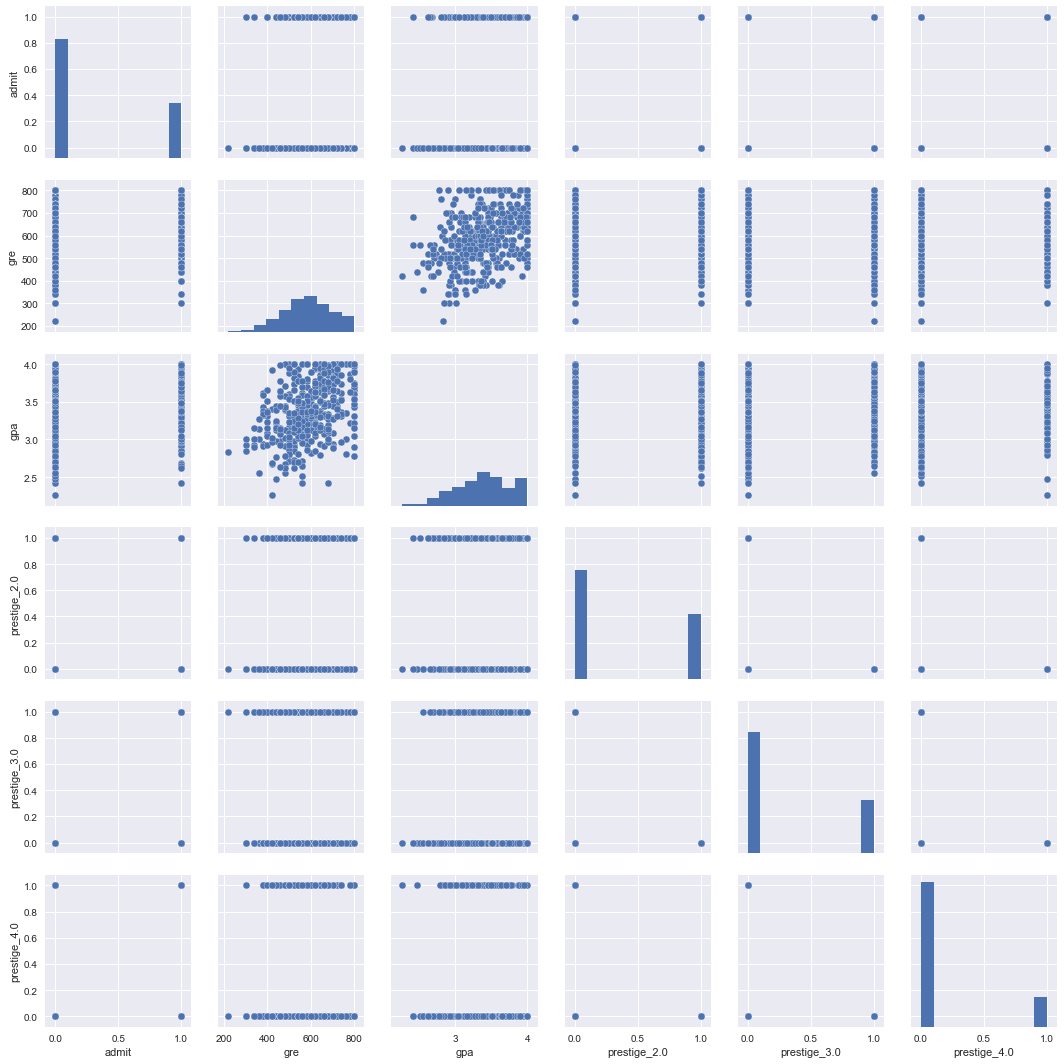

In [21]:
import seaborn as sns
sns.pairplot(df_raw2)

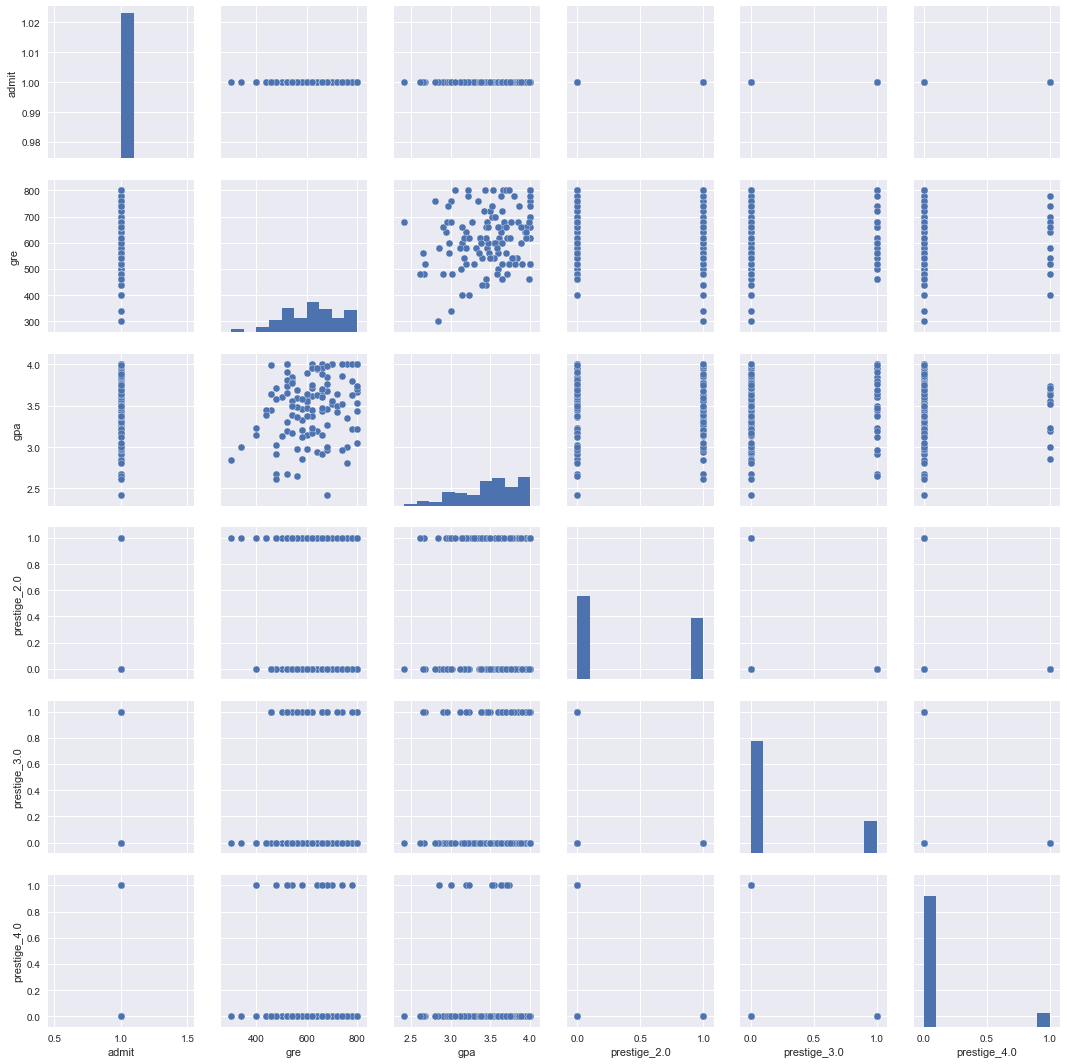

In [39]:
df_raw3 = df_raw2[df_raw2.admit == 1]
sns.pairplot(df_raw3)                 ## Now, I'm looking at the relative frequency of admitted students from the different school prestige categories

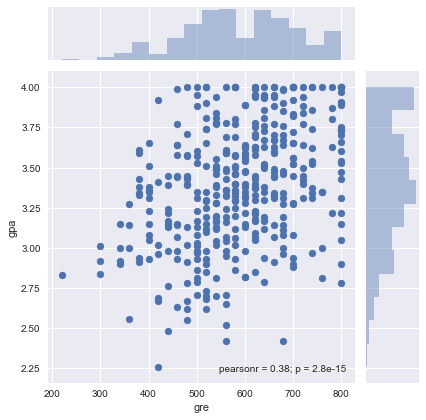

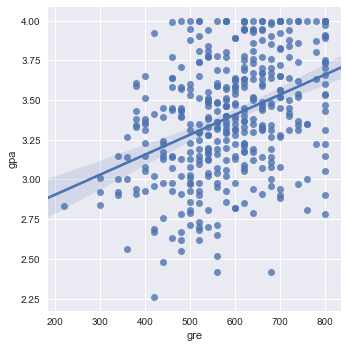

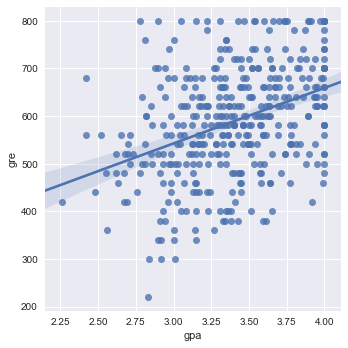

In [22]:
print sns.jointplot(df_raw2.gre, df_raw2.gpa);
print sns.lmplot(x='gre', y='gpa', data=df_raw2);
print sns.lmplot(x='gpa', y='gre', data=df_raw2);

In [23]:
df_raw2.corr()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
admit,1.000000,0.181202,0.174116,0.067459,-0.122302,-0.133859
gre,0.181202,1.000000,0.382408,0.058454,-0.074380,-0.069046
gpa,0.174116,0.382408,1.000000,-0.050507,0.070881,-0.087671
prestige_2.0,0.067459,0.058454,-0.050507,1.000000,-0.510469,-0.347385
prestige_3.0,-0.122302,-0.074380,0.070881,-0.510469,1.000000,-0.298345
prestige_4.0,-0.133859,-0.069046,-0.087671,-0.347385,-0.298345,1.000000


#### Question 12. What did you find?

Answer: There are no collinear variables because the correlations between independent variables are too low. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would run a regression on these variables with the prestige of undergraduate school being the predictor variable and the admission as the outcome variable. We could examine this regression using the statsmodels function and examining the model's goodness of fit and the statistical significance of coefficients (using confidence intervals as well as p-values to make this assessment). 

#### Question 14. What is your hypothesis? 

Answer: Referring to the first matrix under Question 11 (where results are shown for all applicants), it seems that admitted students tend to come from schools with higher prestige. This point is reaffirmed in the second matrix for Question 11 (where results are shown only for admitted applicants) where the correlations between lower-ranked schools (defined as prestige 3-4 schools here) and admit is negative and higher-ranked schools (defined as prestige 2) is positive. Therefore, my hypothesis is that there's a relationship between the prestige of an applicant's undergraduate school and their admission. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data